In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn import datasets

Problema 1

Pregunta 2:

Parámetros de Bagging:

Estimator: Es el estimador base o débil que se utiliza para ajustar los subconjuntos de datos del conjunto de datos original.

n_estimators: el número de estimadores o modelos base en el ensamble

Max_samples: el número de muestras que se toman del conjunto de datos original para entrenar cada modelo base.

Max_features: el número de características que se toman del conjunto de datos original para entrenar cada modelo base.

Bootstrap: indica si el muestreo de los datos se hace con o sin reemplazo

Bootstrap_features: indica si las características se toman con o sin reemplazo.

Oob_score: indica si se utiliza el out-of-bag sample para estimar el error de generalización del modelo.

Warm_start: indica si se añade un estimador nuevo al ensamble o si se reinicia el ensamble desde cero. 

N_jobs: el número de trabajos que se hacen en paralelo tanto para el fit como el predict. 

Random_state: semilla para no perder el muestreo del conjunto de datos original

Verbose: controla el verbosity al hacer fit y predict


Pregunta 3

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,random_state=1)

Pregunta 4

In [3]:
#crear el modelo de clasificacion bagging
Bagging = BaggingClassifier()

#cross validation
cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

Pregunta 5

In [4]:
n_scores = cross_val_score(Bagging, X, y, scoring='accuracy', cv = cross_val, n_jobs=-1,error_score='raise')
print('Media: %.5f' % (np.mean(n_scores)))

Media: 0.88367


La media es de 0.88767

Problema 2

Pregunta 1

In [5]:
precision = []
for i in range(1,21):
  Bagging = BaggingClassifier(n_estimators = i)
  cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(Bagging, X, y, scoring='accuracy', cv = cross_val, n_jobs=-1,error_score='raise')
  precision.append((np.mean(n_scores)))

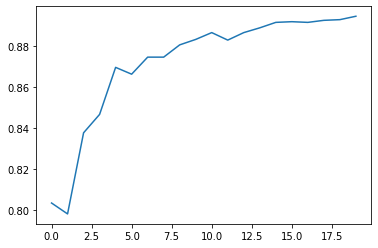

In [6]:
plt.plot(precision)

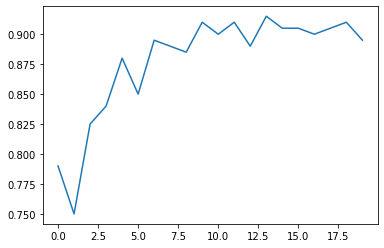

In [7]:
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=43)

for i in range(1,21):
  Bagging = BaggingClassifier(n_estimators = i)
  Bagging.fit(X_train, y_train)
  y_pred = Bagging.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(accuracy)

Al incrementar el numero de estimadores en el ensamble el accuracy va creciendo y va mejorando el modelo.

Pregunta 3

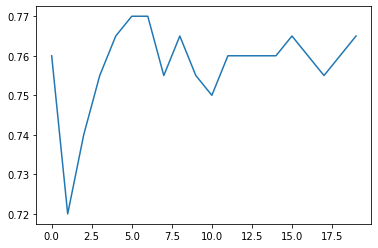

In [8]:
accuracy2 = []

for i in range(1,21):
  Bagging = BaggingClassifier(base_estimator = SVC(kernel = 'poly', degree = 4), n_estimators = i)
  Bagging.fit(X_train, y_train)
  y_pred = Bagging.predict(X_test)
  accuracy2.append(accuracy_score(y_test, y_pred))

plt.plot(accuracy2)

En un inicio, al agregar modelos al ensamble, se mejora el accuracy. A partir de 20 en adelante comienza a converger a una media

Pregunta 4


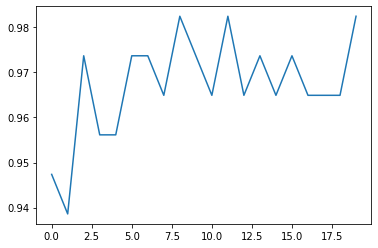

In [9]:
accuracy3 = []

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

for i in range(1,21):
  Bagging = BaggingClassifier(n_estimators = i)
  Bagging.fit(X_train, y_train)
  y_pred = Bagging.predict(X_test)
  accuracy3.append(accuracy_score(y_test, y_pred))

plt.plot(accuracy3)


Como en los dos casos anteriores el accuracy aumenta al incrementar el numero de modelos base en el ensamble